In [4]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 108.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 115.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 98.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 117.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 40.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=418741902ad45c8a4f55f1ddd5e2a06f3fbdba5db073b501bf10bc5ee41d473c
  Stored in directory: /home/jupyterlab/.cache/pip

In [5]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
#Question 1 - Extracting Tesla Stock Data Using yfinance
tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period='max')
tesla_share_price_data.reset_index(inplace=True)
print(tesla_share_price_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [7]:
#Question 2 - Extracting Tesla Revenue Data Using Webscraping
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
rows = table.find_all('tr')
revenue_data_tesla = []

for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    revenue_data_tesla.append({'Date': date, 'Revenue': revenue})

revenue_df_tesla = pd.DataFrame(revenue_data_tesla)
print(revenue_df_tesla.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


In [8]:
#Question 3 - Extracting GameStop Stock Data Using yfinance
game_stop = yf.Ticker("GME")
gme_share_price_data = game_stop .history(period='max')
gme_share_price_data.reset_index(inplace=True)
print(gme_share_price_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [9]:
#Question 4 - Extracting GameStop Revenue Data Using Webscraping
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
rows = table.find_all('tr')
revenue_data_GME = []

for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    revenue_data_GME .append({'Date': date, 'Revenue': revenue })

revenue_df_GME = pd.DataFrame(revenue_data_GME )
print(revenue_df_GME.head())

   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


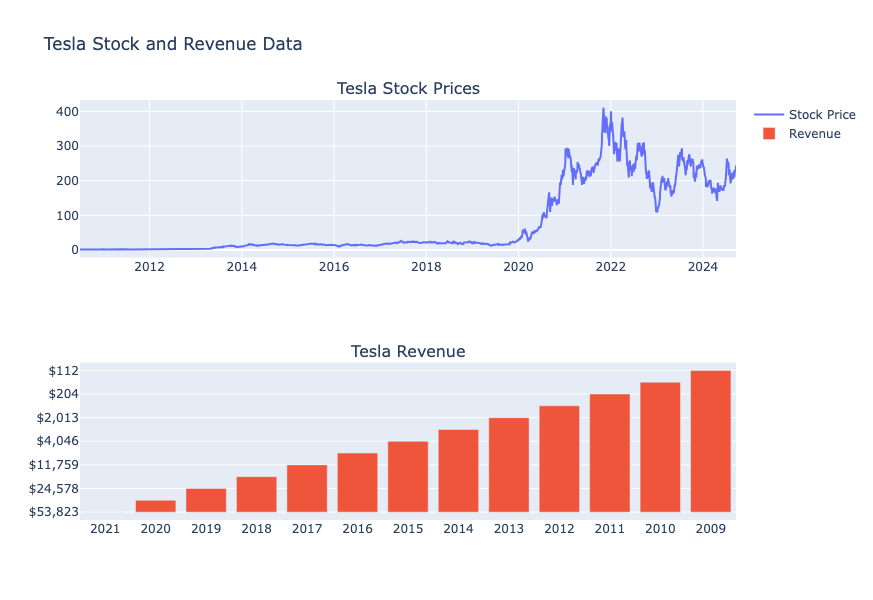

In [11]:
#Question 5 - Tesla Stock and Revenue Dashboard
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, subplot_titles=(f"{stock} Stock Prices", f"{stock} Revenue"))
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Stock Price'),
                      row=1, col=1)
    fig.add_trace(go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'], name='Revenue'),
                      row=2, col=1)
    fig.update_layout(title=f"{stock} Stock and Revenue Data", height=600, width=800)
    fig.show()


make_graph(tesla_share_price_data, revenue_df_tesla, 'Tesla')

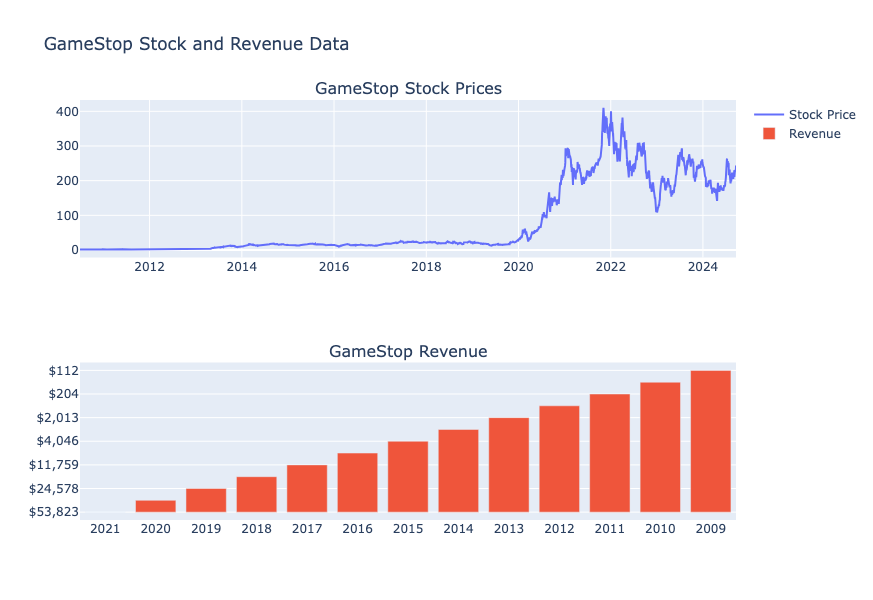

In [13]:
#Question 6 - GameStop Stock and Revenue Dashboard
make_graph(tesla_share_price_data, revenue_df_tesla, 'GameStop')